In [1]:
import torch
import matplotlib.pyplot as plt


In [3]:
vocab = {
    "[PAD]": 0,
    "[MASK]": 1,
    "Transformers": 2,
    "use": 3,
    "self": 4,
    "attention": 5
}

sentence = ["Transformers", "use", "[MASK]", "attention"]
input_ids = torch.tensor([[vocab[w] for w in sentence]])


In [4]:
from encoder import TransformerEncoder

model = TransformerEncoder(len(vocab), 32)
model.eval()


TransformerEncoder(
  (embedding): Embedding(6, 32)
  (position): PositionalEncoding()
  (attention): SelfAttention(
    (q): Linear(in_features=32, out_features=32, bias=True)
    (k): Linear(in_features=32, out_features=32, bias=True)
    (v): Linear(in_features=32, out_features=32, bias=True)
  )
  (ffn): Sequential(
    (0): Linear(in_features=32, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
  )
  (output): Linear(in_features=32, out_features=6, bias=True)
)

In [5]:
with torch.no_grad():
    _, attention_weights = model(input_ids)

attention = attention_weights.squeeze(0)


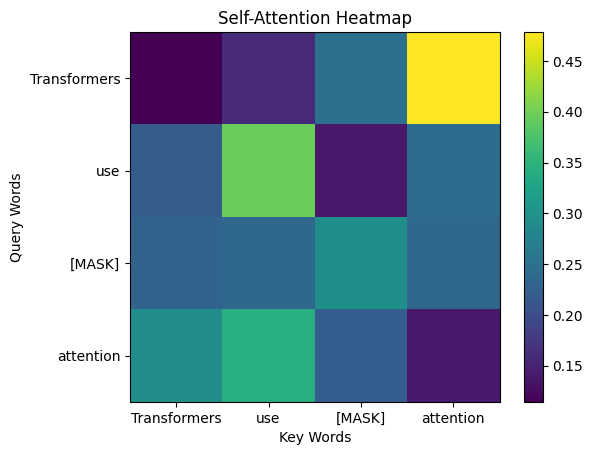

In [6]:
plt.imshow(attention, cmap="viridis")
plt.colorbar()

plt.xticks(range(len(sentence)), sentence)
plt.yticks(range(len(sentence)), sentence)

plt.xlabel("Key Words")
plt.ylabel("Query Words")
plt.title("Self-Attention Heatmap")

plt.show()
